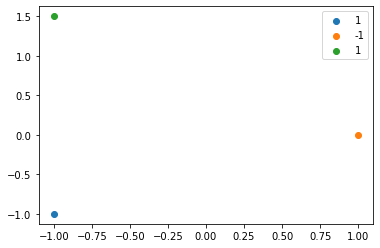

In [2]:
import numpy as np
import matplotlib.pyplot as pl

a = 1.5

x = {
    1: np.array([-1,-1]),
    2: np.array([1,0]),
    3: np.array([-1,a]),    
}

y = {
    1: 1,
    2: -1,
    3: 1,
}

theta = np.array([0, 0])
theta_0 = 0
T = 100

for i in x.keys():
    pl.scatter(x[i][0], x[i][1], label=y[i])

pl.legend(loc='best')
pl.show()

In [3]:
start = 1
x[3][1] = 10
upd = 0

theta_0 = 0

theta = x[start]
n = list(x.keys())

# if start==0:
#     theta = np.array([0, 0])
#     n = list(x.keys())
# elif start>0:
#     theta = x[start]
#     n = list(x.keys())[start:]
#     n.extend(list(x.keys())[:start])
#     n.extend(list(x.keys())[::-1][-start:])

print(f'Initial theta: {theta}')
print(f'Iteration order: {n}')

Initial theta: [-1 -1]
Iteration order: [1, 2, 3]


In [4]:
lis = []

for t in range(T):
    for i in n:
        if y[i]*(np.dot(theta, x[i]))<=0.0:
            print(f'agreement: {y[i]*(np.dot(theta, x[i]))}')
            theta = theta + y[i]*x[i]
#             theta_0 = theta_0 + y[i]
            lis.append(theta.flatten().tolist())
            upd += 1

            
print(f'Update numbers: {upd}') 
print(f'List of thetas: {lis}')

agreement: -9.0
agreement: -7.0
agreement: -5.0
agreement: -3.0
agreement: -1.0
Update numbers: 5
List of thetas: [[-2.0, 9.0], [-3.0, 8.0], [-4.0, 7.0], [-5.0, 6.0], [-6.0, 5.0]]


In [7]:
x1, y1 = np.array([-1,-1]), 1
x2, y2= np.array([1,0]), -1
x3, y3= np.array([-1,1.5]), 1

In [62]:
a = 10

X = np.array([
    [-1, -1],
    [1, 0],
    [-1, a],
])

y_ = [1, -1, 1]

theta = X[2]
print(f'Initial theta: {theta}')

T = 10
errors = [theta.flatten().tolist()]

for _ in range(T):
    for x, y in zip(X, y_):
        if y*(np.dot(theta, x)) <= 0:
            print(f'Agreement: {y*(np.dot(theta, x))}')
            theta = theta + y*x
            errors.append(theta.flatten().tolist())
            
print(f'Number of update: {len(errors)}')
print(f'List of thetas: {errors}')

Initial theta: [-1 10]
Agreement: -9
Agreement: -7
Agreement: -5
Agreement: -3
Agreement: -1
Number of update: 6
List of thetas: [[-1, 10], [-2, 9], [-3, 8], [-4, 7], [-5, 6], [-6, 5]]


In [74]:
class Perceptron:
    
    def __init__(self, theta, n_iter):
        self.theta = theta
        self.n_iter = n_iter
        self.errors = []
        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.upd = 0
        for _ in range(self.n_iter):
            for x, y in zip(self.X, self.Y):
                if y * np.dot(self.theta, x) <= 0.0:
                    self.theta = self.theta + y*x
                    self.errors.append(self.theta.flatten().tolist())
                    self.upd += 1
        
        return self.errors, self.upd               

In [79]:
def main():
    a = 1.5
    X = np.array([[-1,-1],[1,0],[-1,a]])
    Y = np.array([1,-1,1])
    p = Perceptron(X[1], 10)
    print(f'Updates: {p.fit(X, Y)[1]}')
    print(f'THETAS: {p.fit(X, Y)[0]}')
    
if __name__=="__main__":
    main()

Updates: 3
THETAS: [[0.0, -1.0], [-1.0, -1.0], [-2.0, 0.5]]


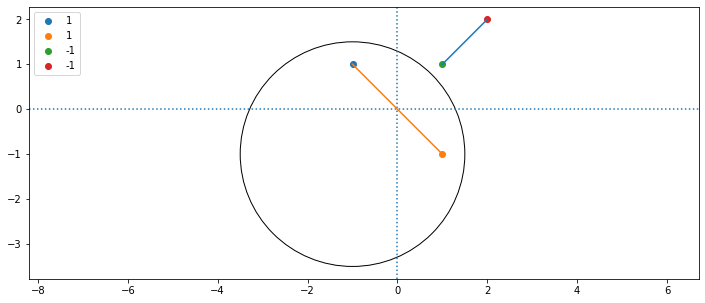

In [116]:
import matplotlib.pyplot as pl

FIGSIZE = (12, 5)
LIM = (-3,3)

X = np.array([[-1,1],[1,-1],[1,1],[2,2]])
Y = np.array([1,1,-1,-1])

x = np.linspace(0, 3, )
pl.figure(figsize=FIGSIZE)

for x, y in zip(X, Y):
    pl.scatter(x[0], x[1], label=y)

c1 = pl.Circle((-1, -1), radius=2.5, fill=False)
pl.axhline(y=0, linestyle='dotted')
pl.axvline(x=0, linestyle='dotted')
pl.axis('equal')
pl.legend(loc='upper left')
fig = pl.gcf()
ax = fig.gca()
ax.add_patch(c1)
a = [i[0] for i in X[2:]]
b = [i[1] for i in X[2:]]
pl.plot(a, b)
a = [i[0] for i in X[:2]]
b = [i[1] for i in X[:2]]
pl.plot(a, b)
pl.show()

In [91]:
from scipy.spatial import distance

print(f'Distance between red and green: {distance.euclidean(X[2],X[3]):.4f} .')

Distance between red and green: 1.4142 .


In [107]:
for i in X[2:]:
    print(i[1])

1
2


In [128]:
class Perceptron:
    
    def __init__(self, theta, theta_0=None, n_iter=100):
        self.theta = theta
        self.theta_0 = theta_0
        self.n_iter = n_iter
        self.errors = []
        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.upd = 0
        for _ in range(self.n_iter):
            for x, y in zip(self.X, self.Y):
                if theta_0:
                    if (y * np.dot(self.theta, x) + self.theta_0) <= 0.0:
                        self.theta = self.theta + y*x
                        self.theta_0 = self.theta_0 + y
                        self.errors.append(self.theta.flatten().tolist())
                        self.upd += 1
                    
                    return self.errors, self.theta_0, self.upd  
                
                else:
                    if y * np.dot(self.theta, x) <= 0.0:
                        self.theta = self.theta + y*x
                        self.errors.append(self.theta.flatten().tolist())
                        self.upd += 1
                    
                    return self.errors, self.upd  
                

def main():
    theta = np.array([0, 0])
    X = np.array([[-1,1],[1,-1],[1,1],[2,2]])
    Y = np.array([1,1,-1,-1])
    p = Perceptron(theta, 0, 10)
    X_pos = X
    Y_pos = Y
    print(f'Updates: {p.fit(X_pos, Y_pos)[1]}')
    print(f'THETAS: {p.fit(X_pos, Y_pos)[0]}')
    print(f'Theta 0: {theta_0}')
    
if __name__=="__main__":
    main()

Updates: 2
THETAS: [[-1, 1], [0, 0]]
Theta 0: 0


In [3]:
import numpy as np

Training = np.array([[-1,-1],[1,0],[-1,10]]) 
Labels = [1,-1,1]
theta = np.array([0,0]) 
theta_0 = 0

print("[",end='')
for j in range (10):
    for i in range(len(Training)):
        if np.dot(theta,Training[i])*Labels[i] + theta_0 <=0:
            theta = theta + Labels[i]*Training[i] 
            theta_0 = theta_0 + Labels[i] 
            print("[%1.1f,%1.1f],"% (theta[0],theta[1]),end='')
print("]",end='')

[[-1.0,-1.0],[-2.0,9.0],[-3.0,8.0],[-4.0,7.0],]

In [5]:
theta = Training[1]

print("[",end='')
for j in range (10):
    for i in range(len(Training)):
        if np.dot(theta,Training[i])*Labels[i]<=0:
            theta = theta + Labels[i]*Training[i] 
            print("[%1.1f,%1.1f],"% (theta[0],theta[1]),end='')
print("]",end='')

[[0.0,-1.0],[-1.0,-1.0],[-2.0,9.0],[-3.0,8.0],[-4.0,7.0],[-5.0,6.0],[-6.0,5.0],]